In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import sklearn
import warnings

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import utils
import ml_functions

red_code = '\033[91m'
blue_code = '\033[94m'
green_code = '\033[92m'
yellow_code = '\033[93m'
reset_code = '\033[0m'

C:\Users\Kadem\AppData\Local\Temp\ipykernel_23756\913017747.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Load the data & Préprocessing

In [2]:
fname = "./datasets/AFDpresidentutf8/corpus.tache1.learn.utf8"
alltxts,alllabs = utils.load_pres(fname)


In [3]:
locuteurs_df = pd.DataFrame()
locuteurs_df['text'] = alltxts
locuteurs_df['label'] = alllabs

In [4]:
preprocessed_alltxts = [utils.preprocess(alltxt) for alltxt in locuteurs_df.text]

preprocessed_locuteurs_df = pd.DataFrame()
preprocessed_locuteurs_df['text'] = preprocessed_alltxts
preprocessed_locuteurs_df['label'] = alllabs

preprocessed_locuteurs_df.describe


<bound method NDFrame.describe of                                                     text  label
0       quand je dis chers amis il ne sagit pas la du...      1
1       dabord merci de cet exceptionnel accueil que ...      1
2       cest toujours tres emouvant de venir en afriq...      1
3       aucun citoyen francais ne peut etre indiffere...      1
4       le congo que naguere le nom qualifia de refug...      1
...                                                  ...    ...
57408              je suis heureux de le mener avec vous      1
57409   vous le savez comme vous jai la passion de la...      1
57410                             je crois en son avenir      1
57411   je crois en la politique cestadire en notre c...      1
57412                                 je compte sur vous      1

[57413 rows x 2 columns]>

In [5]:
# Mélange des données
preprocessed_locuteurs_df = preprocessed_locuteurs_df.sample(frac=1, random_state=42)

preprocessed_locuteurs_df.describe

<bound method NDFrame.describe of                                                     text  label
45008   de mener a bien dans lequite dans le dialogue...      1
5011                            tout cela nest pas exact      1
31032   cest tout le merite du maitre douvrage et des...      1
31493   a lenraciner dans les esprits et dans les coeurs      1
1270    nos deux pays qui travaillent la main dans la...      1
...                                                  ...    ...
54343   et puis nous devons egalement etre porteurs d...      1
38158                      il les impose trop lourdement      1
860                         dautres figures lont marquee      1
15795   avec le gouvernement que jai constitue et qui...     -1
56422   il faut dabord examiner les problemes du cont...     -1

[57413 rows x 2 columns]>

In [6]:
print(len(preprocessed_locuteurs_df['text']))
print(len(preprocessed_locuteurs_df['label']))

57413
57413


### FONCTION D'AFFICHAGE DES METRICS

In [7]:
import matplotlib.pyplot as plt

def plot_metrics(dataframe):
    evaluation_types = dataframe['Type'].unique()
    metrics = ['Accuracy', 'F1 Score', 'AUC']

    # Création de sous-graphiques pour chaque métrique
    fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 8), sharex=True)

    # Parcours des métriques
    for i, metric in enumerate(metrics):
        ax = axes[i]

        # Parcours des types d'évaluation
        for eval_type in evaluation_types:
            eval_type_df = dataframe[dataframe['Type'] == eval_type]
            x = eval_type_df['Model']
            y = eval_type_df[metric]
            ax.plot(x, y, marker='o', label=eval_type)

        ax.set_ylabel(metric)
        ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    plt.xlabel('Model')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# TESTS & EVALUATION

# Régresionn logistic

In [8]:
analyze_function = ml_functions.logistic_regression_analyze
log_df = ml_functions.all_evaluations(preprocessed_locuteurs_df, analyze_function)

Entrainement et évaluation pour Unigram
Entrainement et évaluation pour Bigram
Entrainement et évaluation pour Trigram
Entrainement et évaluation pour Unigram Stop words
Entrainement et évaluation pour Unigram + Stop word
Entrainement et évaluation pour Bigram + Stop word
Entrainement et évaluation pour Trigram + Stop word
Entrainement et évaluation pour Reduction du vocabulaire Unigram
Entrainement et évaluation pour Reduction du vocabulaire Bigram
Entrainement et évaluation pour Reduction du vocabulaire Trigram
Entrainement et évaluation pour Reduction du vocabulaire Unigram Stop words
Entrainement et évaluation pour Reduction du vocabulaire Unigram + Stop word
Entrainement et évaluation pour Reduction du vocabulaire Bigram + Stop word
Entrainement et évaluation pour Reduction du vocabulaire Trigram + Stop word


In [9]:
log_df.describe

<bound method NDFrame.describe of                                             Type   Model  Accuracy  F1 Score  \
0                                        Unigram   Count  0.868501  0.929610   
1                                        Unigram  TF-IDF  0.131325  0.000000   
2                                         Bigram   Count  0.868763  0.929767   
3                                         Bigram  TF-IDF  0.131325  0.000000   
4                                        Trigram   Count  0.868675  0.929723   
5                                        Trigram  TF-IDF  0.131325  0.000000   
6                             Unigram Stop words   Count  0.868501  0.929610   
7                             Unigram Stop words  TF-IDF  0.131325  0.000000   
8                            Unigram + Stop word   Count  0.868763  0.929767   
9                            Unigram + Stop word  TF-IDF  0.131325  0.000000   
10                            Bigram + Stop word   Count  0.868763  0.929767   
11    

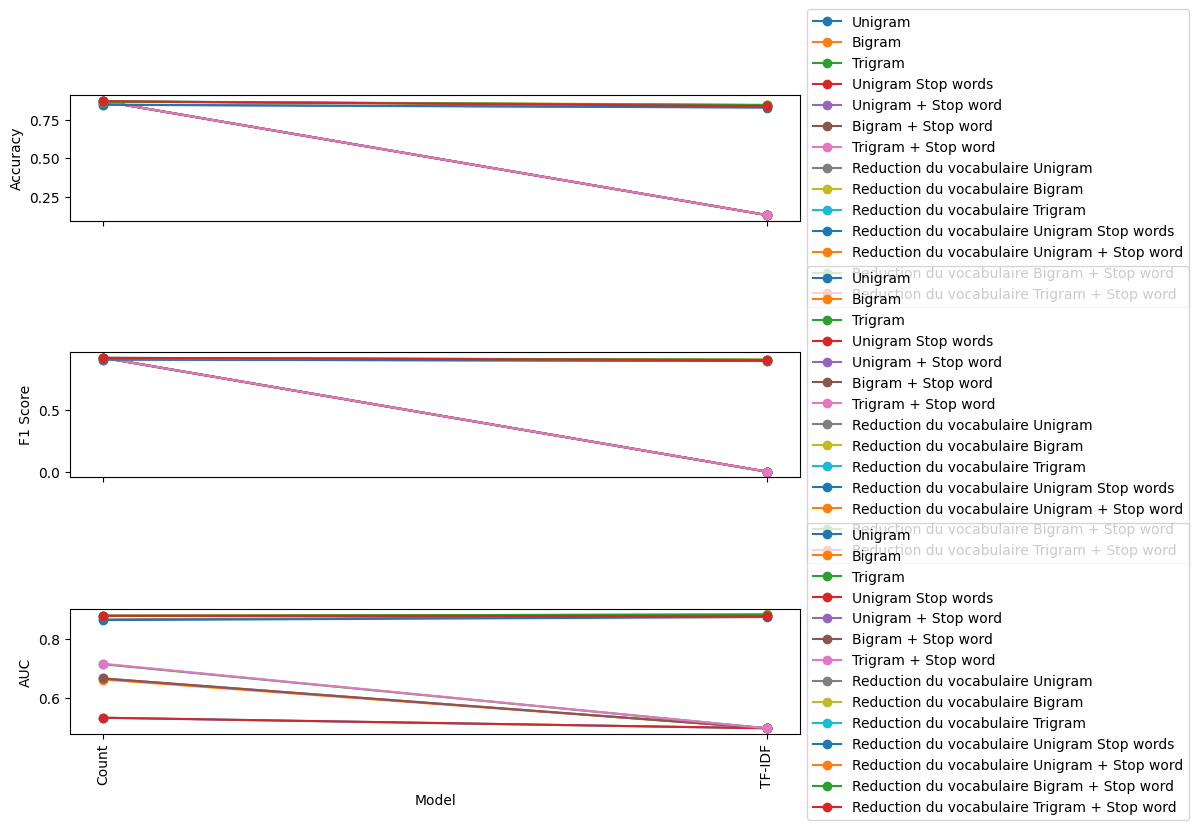

In [10]:
plot_metrics(log_df)